/Users/k1ito/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


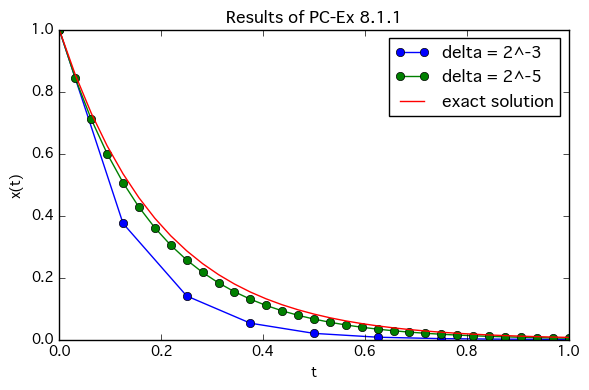

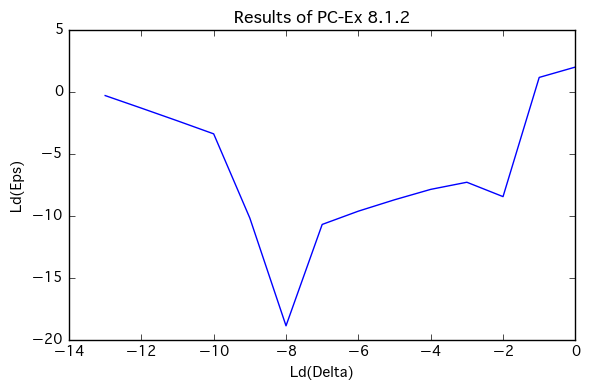

In [51]:
import matplotlib.pyplot as plt
import math


def a811(t,x):
    return -5*x

def roundoff(x,i=3):
    return float(format(x,'.' + str(i) + 'g'))

def euler_method(a,x0,delta):
    t =[delta*x for x in range(int(1/delta)+1)]
    y =[x0]
    for tn in t:
        y.append(y[-1]+a(tn,y[-1])*delta)
    y.pop()
    return [t,y]


def euler_method_round(a,x0,delta):
    t =[roundoff(delta*x) for x in range(int(1/delta)+1)]
    y =[x0]
    for tn in t:
        y.append(roundoff(y[-1]+a(tn,y[-1])*delta))
    y.pop()
    return [t,y]


def answer811():
    # PC-Exercise 8.1.1
    # Apply the Euler method (1.2) to the VIP dx/dt = -5x , x(0) = 1, with \delta = 2^-3 ,2^-5 over 0 <= t <= 1

    plt.title("Results of PC-Ex 8.1.1")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    ans1 = euler_method(a811,1.0,2**(-3))
    ans2 = euler_method(a811,1.0,2**(-5))
    exact_x = [x*(2**(-5)) for x in range(2**5 + 1)]
    exact_y = [math.exp(-5*x) for x in exact_x]
    plt.plot(ans1[0],ans1[1],"-o",label="delta = 2^-3")
    plt.plot(ans2[0],ans2[1],"-o",label="delta = 2^-5")
    plt.plot(exact_x,exact_y ,label = "exact solution")
    plt.legend()
    plt.show()
    plt.close()
    
def answer812():
    plt.title("Results of PC-Ex 8.1.2")
    plt.xlabel("Ld(Delta)")
    plt.ylabel("Ld(Eps)")
    x=[]
    y=[]
    for i in range(0,-14,-1):
        p =  euler_method_round(a811,1.0,2**i)
        x.append(i)
        e = math.fabs(math.exp(-5*p[0][-1])-p[1][-1])
        e = float(format(e,'.5g'))
        e = math.log(e,2)
        y.append(e)
    plt.plot(x,y)
    plt.show()
    plt.close()

        
answer811()
answer812()